## Morphology locations as a Form

This is probably not very useful. Morphology locations are a rather abstract concept.
The form simply plots the generate locations on the morphology and writes them to a csv file.

In [1]:
import obi_one as obi
from pathlib import Path

morph_path = Path("../data/morphologies/L5_TPC:A_MusMusculus_PrimarySomatosensory_C060114A5/C060114A5.swc")

/Users/james/Documents/obi/code/obi-one/.venv/lib/python3.12/site-packages/pydantic/_internal/_fields.py:198: UserWarning: Field name "name" in "Publication" shadows an attribute in parent "Block"
  warnings.warn(
/Users/james/Documents/obi/code/obi-one/.venv/lib/python3.12/site-packages/pydantic/_internal/_fields.py:198: UserWarning: Field name "name" in "CellMorphology" shadows an attribute in parent "Block"
  warnings.warn(
/Users/james/Documents/obi/code/obi-one/.venv/lib/python3.12/site-packages/pydantic/_internal/_fields.py:198: UserWarning: Field name "name" in "Subject" shadows an attribute in parent "Block"
  warnings.warn(


[2025-09-02 08:46:13,889] INFO: None
[2025-09-02 08:46:13,891] INFO: create_bbp_workflow_campaign_config() not yet complete.


/Users/james/Documents/obi/code/obi-one/obi_one/scientific/morphology_locations/morphology_location_form.py:71: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  xyz.groupby(_PRE_IDX).apply(lambda _x: ax.scatter(_x["x"], _x["y"], s=6))
/Users/james/Documents/obi/code/obi-one/obi_one/scientific/morphology_locations/morphology_location_form.py:71: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  xyz.groupby(_PRE_IDX).apply(la

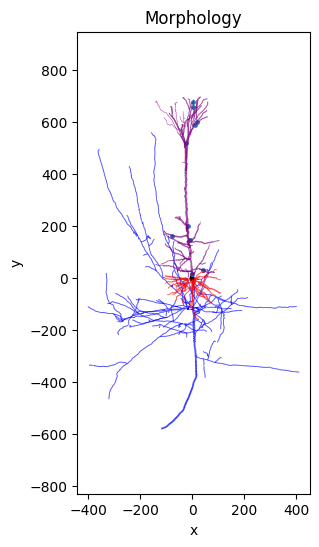

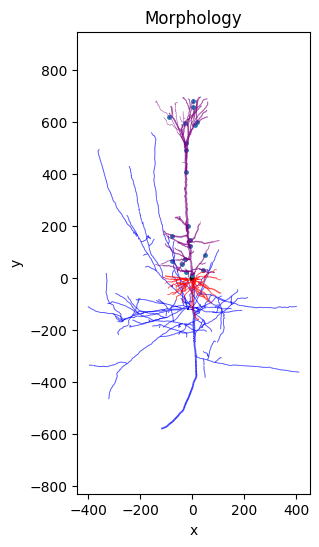

In [2]:
morph_locations = obi.RandomMorphologyLocations(number_of_locations=[10, 20], section_types=(4, ))
# Try this one for a more exciting example.
# morph_locations = obi.ClusteredPathDistanceMorphologyLocations(
#                         number_of_locations=[100, 200],
#                         section_types=(4, ),
#                         n_clusters=10,
#                         cluster_max_distance=20,
#                         path_dist_mean=200,
#                         path_dist_sd=80,
#                         n_groups_per_cluster=2,
#                     )
morph_loc_form = obi.MorphologyLocationsForm(
                    initialize=obi.MorphologyLocations.Initialize(
                        morphology=[morph_path]
                    ),
                    morph_locations=morph_locations
)

grid_scan = obi.GridScan(form=morph_loc_form, output_root="../../../obi-output/morphology_locations")
grid_scan.execute(processing_method="run")

## Morphology locations blocks

There are several blocks of differing complexity that generate locations. Above, we used the simplest one, but others are available.

Here, we demo most of them.

In [3]:
from morphio import Morphology as MorphioMorphology
m = MorphioMorphology(morph_path)

### RandomMorphologyLocations
Simplest case: Random locations without constraints.

Note that there are no constraints on path distance or anything, really.

In [4]:
# Default number of locations is 1
tst = obi.RandomMorphologyLocations()
display(tst.points_on(m))

# Can specify a larger number instead.
tst = obi.RandomMorphologyLocations(number_of_locations=10)
display(tst.points_on(m))

# Can also limit the section types.
# Note that the above likely has different section types, this one only shows "4".
tst = obi.RandomMorphologyLocations(number_of_locations=10, section_types=(4, ))
display(tst.points_on(m))

,segment_id,section_id,section_type,segment_offset,path_distance,source_index,normalized_section_offset
0,13,169,2,1.717101,447.357938,0,0.639919


,segment_id,section_id,section_type,segment_offset,path_distance,source_index,normalized_section_offset
0,121,126,2,1.900856,571.989530,0,0.854157
1,39,141,2,1.353891,332.392681,0,0.852600
2,4,144,2,1.735432,556.837090,0,0.054285
3,57,168,2,1.581673,361.602878,0,0.647452
4,13,169,2,0.163442,447.357938,0,0.639919
5,8,199,3,0.125681,41.593017,0,0.258579
6,21,222,3,0.059699,37.054228,0,0.778710
7,6,254,3,1.606591,37.121108,0,0.099668
8,13,328,4,3.391054,275.199254,0,0.821467
9,30,358,4,2.823483,126.999160,0,0.556715


,segment_id,section_id,section_type,segment_offset,path_distance,source_index,normalized_section_offset
0,3,304,4,1.932028,553.429249,0,0.120972
1,1,309,4,1.375812,641.342161,0,0.032926
2,10,310,4,1.283931,655.756402,0,0.815279
3,96,319,4,2.945596,740.790337,0,0.813551
4,108,319,4,0.139708,765.267371,0,0.939105
5,0,326,4,0.246460,210.808930,0,0.000000
6,34,332,4,0.031643,239.926013,0,0.607566
7,35,340,4,1.732307,213.000368,0,0.784221
8,11,361,4,1.415862,75.361434,0,0.228948
9,1,371,4,2.568509,4.367881,0,0.558705


### RandomGroupedMorphologyLocations
This only adds a grouping to the output. That is, the column "source_index" can have values other than 0.

In [5]:
# Default is a single group. This does not change anything.
tst = obi.RandomGroupedMorphologyLocations()
display(tst.points_on(m))

# More customized. Now "source_index" has different values
tst = obi.RandomGroupedMorphologyLocations(number_of_locations=10, n_groups=2)
display(tst.points_on(m))

,segment_id,section_id,section_type,segment_offset,path_distance,source_index,normalized_section_offset
0,13,169,2,1.717101,447.357938,0,0.639919


,segment_id,section_id,section_type,segment_offset,path_distance,source_index,normalized_section_offset
0,121,126,2,1.900856,571.989530,0,0.854157
1,39,141,2,1.353891,332.392681,1,0.852600
2,4,144,2,1.735432,556.837090,0,0.054285
3,57,168,2,1.581673,361.602878,1,0.647452
4,13,169,2,0.163442,447.357938,1,0.639919
5,8,199,3,0.125681,41.593017,1,0.258579
6,21,222,3,0.059699,37.054228,1,0.778710
7,6,254,3,1.606591,37.121108,1,0.099668
8,13,328,4,3.391054,275.199254,0,0.821467
9,30,358,4,2.823483,126.999160,1,0.556715


### ClusteredMorphologyLocations
This constrains generated locations such that they are clustered. That means, groups of them will be within a specified maximum distance of each other. Note that this distance is two times the value of the parameter 'cluster_max_distance'.

In [6]:
# Note that many locations will be on the same section and nearby segments.
tst = obi.ClusteredMorphologyLocations(number_of_locations=20, n_clusters=5, cluster_max_distance=5.0)
display(tst.points_on(m))

# Also section type can always be specified.
tst = obi.ClusteredMorphologyLocations(number_of_locations=20, n_clusters=5,
                                       cluster_max_distance=5.0, section_types=(3,))
display(tst.points_on(m))

,segment_id,section_id,section_type,segment_offset,path_distance,source_index,normalized_section_offset
0,32,186,3,0.877714,124.463259,0,0.922827
1,33,186,3,1.919091,126.819746,0,0.958462
2,33,186,3,1.210663,126.819746,0,0.958462
3,34,186,3,0.304689,128.232456,0,0.992114
4,4,266,4,2.455485,185.013322,1,0.659211
5,5,266,4,2.309554,188.104051,1,0.836373
6,5,266,4,2.582179,188.104051,1,0.836373
7,0,329,4,3.207534,191.062594,1,0.000000
8,10,217,3,1.592915,57.489186,2,0.158271
9,11,217,3,0.412682,60.120405,2,0.182466


,segment_id,section_id,section_type,segment_offset,path_distance,source_index,normalized_section_offset
0,7,224,3,0.603152,57.548093,0,0.132768
1,9,224,3,1.382524,59.220944,0,0.156088
2,11,224,3,0.703051,63.581738,0,0.204653
3,11,224,3,0.755092,63.581738,0,0.204653
4,11,238,3,1.730516,59.183707,1,0.226096
5,11,238,3,2.019573,59.183707,1,0.226096
6,11,238,3,2.201303,59.183707,1,0.226096
7,15,238,3,2.416174,66.774733,1,0.339280
8,0,229,3,1.744547,10.527065,2,0.000000
9,2,229,3,0.196394,14.579744,2,0.371845


### ClusteredPathDistanceMorphologyLocations
This exposes the full complexity: Several clusters at specific path distances, and several groups per cluster.

In [7]:
tst = obi.ClusteredPathDistanceMorphologyLocations(
    number_of_locations=100,
    n_clusters=5,
    cluster_max_distance=10.0,
    path_dist_mean=100.0,
    path_dist_sd=2.0
)
display(tst.points_on(m))


,reference_loc_index,segment_id,section_id,section_type,segment_offset,path_distance,source_index,normalized_section_offset
0,0,40,246,3,1.245280,90.709366,0,0.524390
1,0,40,246,3,0.242063,90.709366,0,0.524390
2,0,40,246,3,2.396422,90.709366,0,0.524390
3,0,42,246,3,0.692876,92.835898,0,0.545095
4,0,47,246,3,0.700187,98.358747,0,0.596748
...,...,...,...,...,...,...,...,...
95,4,36,238,3,0.990326,104.795611,4,0.890393
96,4,36,238,3,1.678552,104.795611,4,0.890393
97,4,38,238,3,0.910579,107.444342,4,0.924708
98,4,38,238,3,0.570457,107.444342,4,0.924708
